In [2]:
import pathlib
import requests

def get_data(cache_key, url):
    """
    get_data is a little helper that downloads a given URL only if its data
    is not in the cache already.
    """
    cache = pathlib.Path('cached_{}'.format(cache_key))
    if cache.exists():
        return cache.read_text()
    with open(cache, 'w+') as fp:
        fp.write(requests.get(url).text)
    return cache.read_text()

# Jupyter & JupyterLab

- My name is **Horst Gutmann** üëã
- Software architect @ NETCONOMY (https://netconomy.net) üñ•
- Lots of analysis work where its good to "know the numbers" üìä
- **Just a user**. I didn't come up with this stuff! üòÖ

## Literate programming

Back in 1984, Donald Knuth coined the term **Literate programming**:

> [...] is a programming paradigm in which a computer program is given an explanation of its logic in a natural language, such as English, interspersed with snippets of macros and traditional source code, from which compilable source code can be generated.
>
> -- https://en.wikipedia.org/wiki/Literate_programming

So unlike code-comments, you write prosa text and sprinkle code etc. in it to be executed.

## Reproducible documentation

- Reports that come with all the data and processing logic
  - Where is all that data in your report coming from?
  - What did you do to it before it ended up in the report?

- Data journalism
  - Pretty much the same set of questions...

- Performance measurements of your fancy new web application
  - Guess what? You will be asked the same questions!

## The Jupyter project

- Project to develop cross-language and cross-platform software for *interactive computing*
- Started off with a "better" Python REPL
- https://jupyter.org

## Jupyter Notebook

Interactive web application that lets you create and share documents containing...

- live code (default: Python; other languages are supported through extensions)
- equations
- diagrams
- ...

## Docs + data + code

Let's find out, who spoke on day 1 at WTD Prague 2019:

In [8]:
import yaml
import pprint

speaker_url = 'https://raw.githubusercontent.com/writethedocs/www/master/docs/_data/prague-2019-day-1.yaml'
sessions = yaml.load(get_data('speakers', speaker_url), Loader=yaml.SafeLoader)

for session in sessions:
    if session['Duration'] == '30':
        segments = session['Session'].split(' - ')
        if len(segments) > 1:
            print(segments[0])

Kayla Lee
James Scott
Brian Lemke
Kelly O'Brien
Alison MacNeil
Ben Ahmady
Karen Sawrey
Ilona Koren-Deutsch


You can do graphs of things like slot durations üçø

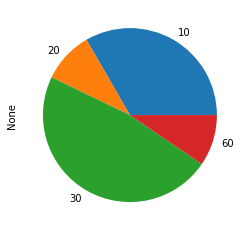

In [9]:
import pandas as pd

all_durations = [int(s['Duration']) for s in sessions if s.get('Duration')]
all_durations = pd.Series(all_durations)

display(all_durations.groupby(all_durations).count().plot.pie())

## JupyterLab = JupyterNotebook++

- JupyterLab is basically the advanced version of JupyterNotebook
- Development environment for notebooks
- Multiple tabs
- Views for code output
- In-browser file management
- ...

## Share notebooks

- You can share notebook files with other people and they can re-run your calculations.
  - ipynb files don't contain variable state but just the source and the output!
- For public notebooks you can also use https://nbviewer.jupyter.org/
- GitHub renders notebooks, too!

![](github-preview.png)

## Find out more:

https://jupyter.org
    
## Installation

```
$ pipenv install jupyterlab \
    pandas
    requests
    
$ pipenv run jupyter lab
```

Alternatively, I also maintain the [zerok/jupyter Docker image](https://github.com/zerok/jupyter-docker-image), which comes with a lot of batteries:

```
$ eval $(docker run --rm zerok/jupyter bash-func)
$ lab
[I 17:36:49.803 LabApp] Writing notebook server cookie secret to /root/.local/share/jupyter/runtime/notebook_cookie_secret
[I 17:36:50.074 LabApp] JupyterLab extension loaded from /usr/local/lib/python3.7/site-packages/jupyterlab
[I 17:36:50.074 LabApp] JupyterLab application directory is /usr/local/share/jupyter/lab
[I 17:36:50.076 LabApp] Serving notebooks from local directory: /data
[I 17:36:50.076 LabApp] The Jupyter Notebook is running at:
[I 17:36:50.076 LabApp] http://39c8570e9c77:9980/?token=f9c906589acd04fe97130c4b34cf05c2d6950306688a9e40
[I 17:36:50.076 LabApp]  or http://127.0.0.1:9980/?token=f9c906589acd04fe97130c4b34cf05c2d6950306688a9e40
[I 17:36:50.076 LabApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
[C 17:36:50.079 LabApp]
```